In [24]:
import ROOT as R
import array
import numpy as np
from math import log10
import pandas as pd
import datetime
import time
import deode_TL
import os
import FTT_spectrum as FFT_script
import socket
gemroc=0
acq_time=1

In [2]:
%jsroot off
c = R.TCanvas("c")
R.gStyle.SetOptStat(1)


In [3]:
def acquire_data(gemroc_num,run_time):
    HOST_IP="192.168.1.200"
    HOST_PORT=58880 + gemroc_num
    BUFSIZE=32000
    dataSock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    dataSock.settimeout(3)
    dataSock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    dataSock.bind((HOST_IP,HOST_PORT))
    data_list_tmp=[]
    start_time=time.time()
    while time.time()-start_time<run_time:
        data=dataSock.recv(BUFSIZE)
#         data="a"
        data_list_tmp.append(data)
    with open ("raw_data/{}.raw".format(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")), 'wb+') as savefile:
        for item in data_list_tmp:
            savefile.write(item)
            
            
decode_istance=deode_TL.reader("raw_data/")

def decode_data(filename,gemroc):
    out_name=("root_files/")+filename.split("raw_data/")[1].split(".")[0]+".root"
    decode_istance.write_root(filename,gemroc, 0, 0, out_name)
def get_last_file(mypath):
    onlyfiles = [f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath, f)) and 'missing_frames' not in f)]
    onlyfiles.sort()
    return (os.path.join(mypath,onlyfiles[-1]))

In [29]:
acquire_data(gemroc,acq_time)
decode_data(get_last_file("raw_data/"),gemroc)

Sub 0 G 0 done in 0.236619


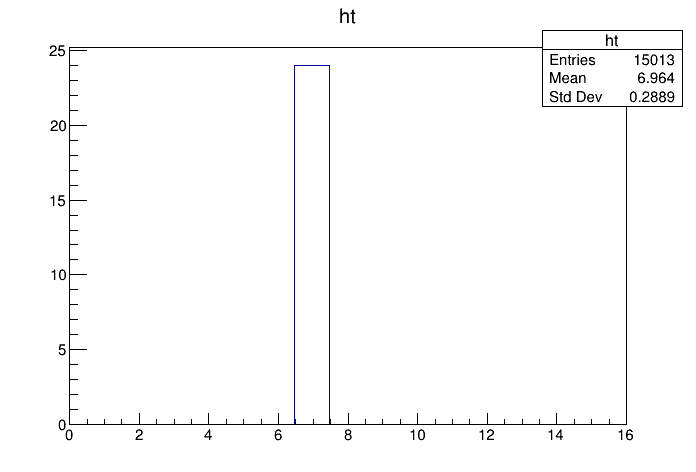

In [30]:
f=R.TFile(get_last_file("root_files/"))
# decode_data("raw_data/2020_08_07_15_37_45.raw",0)
# f=R.TFile("root_files/2020_08_07_15_37_45.root")

ht=R.TH1I("ht","ht",10000,0,16)
f.tree.Draw("timestamp>>ht","")
c.Draw()

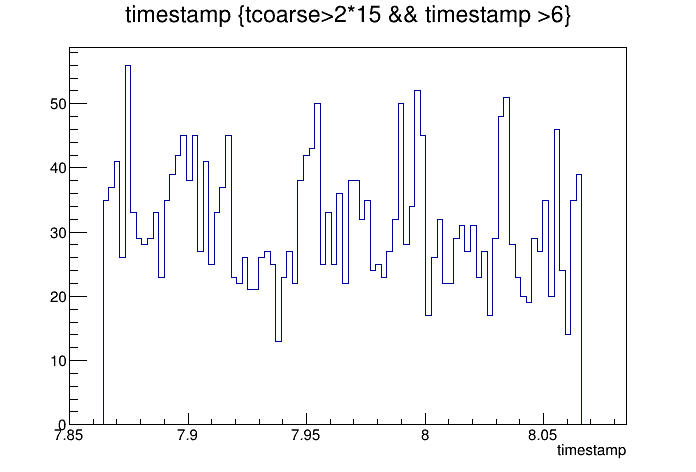

In [25]:
f.tree.Draw("timestamp","tcoarse>2*15 && timestamp >6","colz")
c.Draw()

In [26]:
ext_1,ext_2=ht.GetBinLowEdge(ht.FindFirstBinAbove(0)),ht.GetBinCenter(ht.FindLastBinAbove(0))
R.gStyle.SetOptStat(0)


In [27]:
h_trans_hz_0, h_spec_0, h_ori=FFT_script.extract_spectrum(f.tree,10000,ext_1,ext_2)

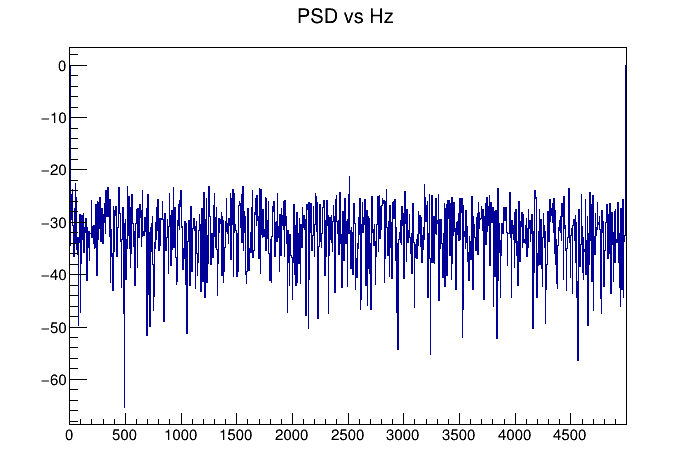

In [28]:
h_spec_0.Draw()
c.Draw()

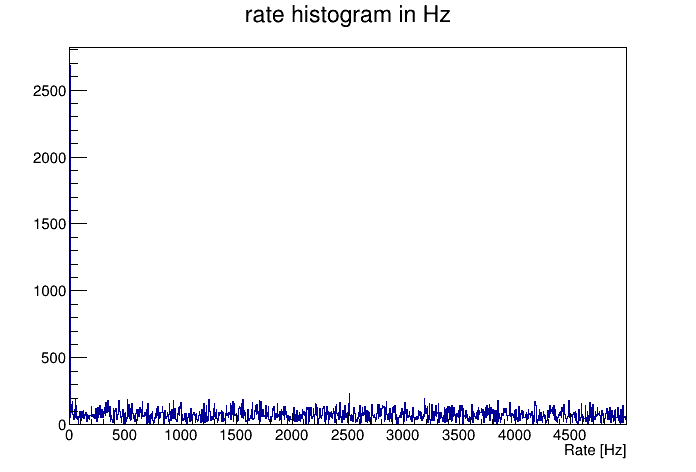

In [29]:
h_trans_hz_0.Draw()
c.Draw()

Warning in <TSpectrum::SearchHighRes>: Peak buffer full


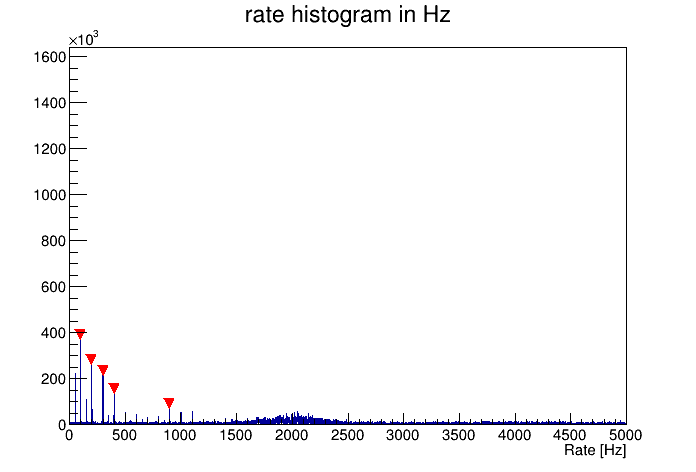

In [23]:
spect = R.TSpectrum(5)
spect.Search(h_trans_hz_0)
# xs=spect.GetPositionX()
# ys=spect.GetPositionY()
# peaks=np.zeros((spect.GetNPeaks(),2))
# for i in range (0,spect.GetNPeaks()):
#     peaks[i]=(xs[i],ys[i])
# srted=peaks[np.argsort(peaks[:,1])]
# srted=srted[::-1]
# for i in range (0,spect.GetNPeaks()):
#         if (srted[i,0]<500):
#              print (f'Freq {srted[i,0]:.2f},  amplitude {srted[i,1]:.2f}')
spect.Draw()
c.Draw()

In [12]:
xs=spect.GetPositionX()

In [104]:
for elem in range(0,5):
    print (xs[elem])

2444.390117795174
101.33467626855625
205.1409300070773
299.0608738657392
2676.718399971864


In [27]:
rate=ht.Integral()/(ext_2-ext_1)

In [28]:
ht.Integral()

10010.0

In [29]:
rate

20020.0

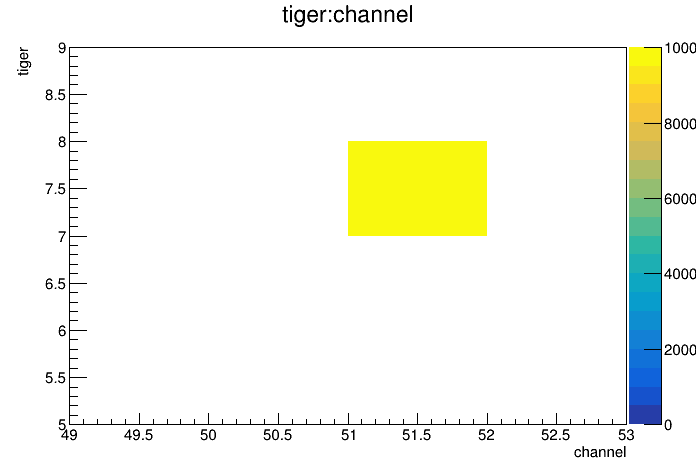

In [30]:
f.tree.Draw("tiger:channel","","colz")
c.Draw()

In [31]:
rate/64

312.8125

In [32]:
h_rate= R.TH1F("h_rate","h_rate",64,0,64)
f.tree.Draw("channel>>h_rate","","colz")


10010

In [33]:
h_rate.Scale(1/(ext_2-ext_1))

In [112]:
h_rate.Sumw2(1)
h_rate.Draw("")
c.Draw()

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [113]:
h_rate_proj=R.TH1F("h_rate_proj","h_rate_proj",1000,0,100000)
for i in range (0, 64):
    h_rate_proj.Fill(h_rate.GetBinContent(i))

In [114]:
R.gStyle.SetOptStat(1111)

h_rate_proj.Draw()


In [115]:
c.Draw()